# Week 2
## Part 3: Plotting degree distributions - binning

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

generate 5000 data points from a Gaussian distribution with μ=2 and σ=0.125


In [39]:
np.random.seed(42)
sigma = 0.125
mu = 2

# generate 5000 gaussian random numbers
randNums = np.random.normal(mu, sigma, 5000)

Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?

In [40]:
hist,bin_edges = np.histogram(randNums, bins=10)
print(hist)
print(bin_edges)

[  36  144  492 1083 1397 1127  538  152   28    3]
[1.59484158 1.6844354  1.77402921 1.86362302 1.95321683 2.04281065
 2.13240446 2.22199827 2.31159209 2.4011859  2.49077971]


This returns:
- hist : array
  - The values of the histogram.
- bin_edges : array of dtype float
  - Return the bin edges (length(hist)+1)

Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.


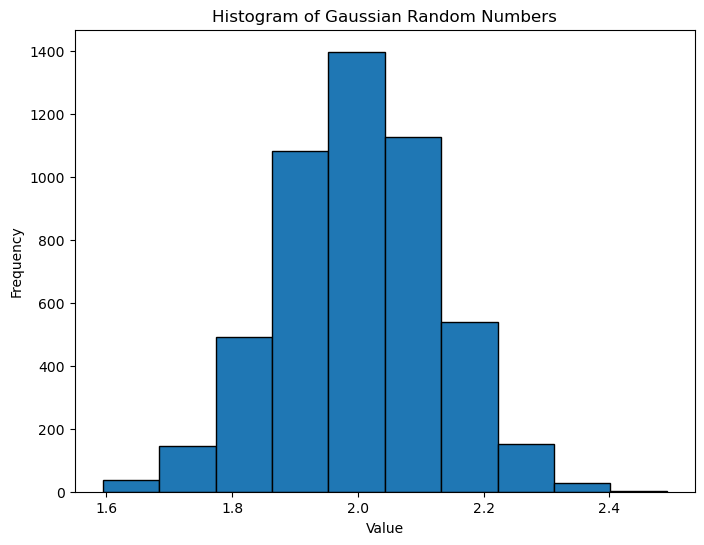

In [41]:
# plot histogram using the bin edges and the values of the histogram not the midpoints
plt.figure(figsize=(8,6))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor="black", align="edge")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Gaussian Random Numbers")
plt.show()


I decided to not use the last bin edge, and make the histogram bins have the width of the "intervals"

Now we'll generate a bunch of integers and set the bin boundaries manually. 

This time, let's grab data from a Poisson distribution. 

As it turns out numpy also has some convenient random number generators. 

Use numpy.random.poisson to generate 5000 numbers drawn from a Poisson distribution characterized by λ=10. 
Find the maximum and minimum value of your 5000 random numbers.

In [42]:
np.random.seed(42)
random_pois = np.random.poisson(lam=10, size=5000)
print("first 10 random poisson", random_pois[:10])

print("max ", np.max(random_pois))
print("min ", np.min(random_pois))

first 10 random poisson [12  6 11 14  7  8  9 11  8 10]
max  24
min  1


Instead of simply specifying the number of bins for numpy.histogram, let's specify the bins we want using a vector.

Create a vector v
  - that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number. Use the vector by setting numpy.histogram's bin parameter as bin = v

What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

In [43]:
v = np.arange(np.min(random_pois), np.max(random_pois)+1)
print(v)

hist_pois, bin_edges_pois = np.histogram(random_pois, bins=v)
print("Sum of bin counts: ", np.sum(hist_pois))
print("First bin edge: ", bin_edges_pois[0], " (should be min: ", np.min(random_pois), ")")
print("Last bin edge: ", bin_edges_pois[-1], " (should be max: ", np.max(random_pois), ")")


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Sum of bin counts:  5000
First bin edge:  1  (should be min:  1 )
Last bin edge:  24  (should be max:  24 )


Now, use a bar chart (matplotlib.pyplot.bar) to plot the distribution

len hist_pois:  23
len v:  24


<BarContainer object of 23 artists>

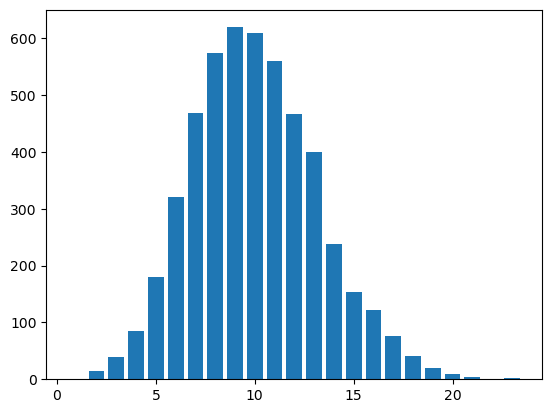

In [44]:
print("len hist_pois: ", len(hist_pois))
print("len v: ", len(v))

plt.bar(v[:-1],hist_pois)

Binning and plotting degree distributions.
- Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above.

In [51]:
# finding teh average degree which is the same as the mean of the poisson distribution
print("Average degree: ", np.mean(random_pois))
# ⟨k⟩=p(N−1)
# p = ⟨k⟩/(N−1)

prob = 10 / (5000 - 1)
print("p: ", p)

Average degree:  10.0184
p:  0.002000400080016003


In [56]:
G_erdos = nx.erdos_renyi_graph(n=5000, p=prob, seed=42) # constructing the erdos graph

# extracting the degree distribution
G_erdos_degree_dist = G_erdos.degree()
print(G_erdos_degree_dist)

[(0, 12), (1, 10), (2, 10), (3, 11), (4, 11), (5, 10), (6, 7), (7, 4), (8, 18), (9, 12), (10, 4), (11, 10), (12, 8), (13, 9), (14, 13), (15, 11), (16, 8), (17, 10), (18, 12), (19, 8), (20, 12), (21, 8), (22, 8), (23, 9), (24, 5), (25, 6), (26, 8), (27, 12), (28, 17), (29, 9), (30, 10), (31, 10), (32, 11), (33, 9), (34, 10), (35, 10), (36, 5), (37, 6), (38, 7), (39, 10), (40, 7), (41, 2), (42, 11), (43, 12), (44, 13), (45, 7), (46, 10), (47, 4), (48, 10), (49, 15), (50, 9), (51, 14), (52, 11), (53, 12), (54, 12), (55, 12), (56, 12), (57, 12), (58, 10), (59, 8), (60, 12), (61, 9), (62, 12), (63, 13), (64, 9), (65, 15), (66, 13), (67, 7), (68, 9), (69, 14), (70, 18), (71, 22), (72, 16), (73, 6), (74, 5), (75, 9), (76, 13), (77, 13), (78, 10), (79, 9), (80, 14), (81, 7), (82, 17), (83, 8), (84, 9), (85, 10), (86, 13), (87, 7), (88, 4), (89, 9), (90, 8), (91, 8), (92, 9), (93, 9), (94, 9), (95, 7), (96, 13), (97, 4), (98, 11), (99, 12), (100, 9), (101, 15), (102, 7), (103, 11), (104, 8), (1

Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

[24, 22, 22, 22, 22, 22, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,

<BarContainer object of 24 artists>

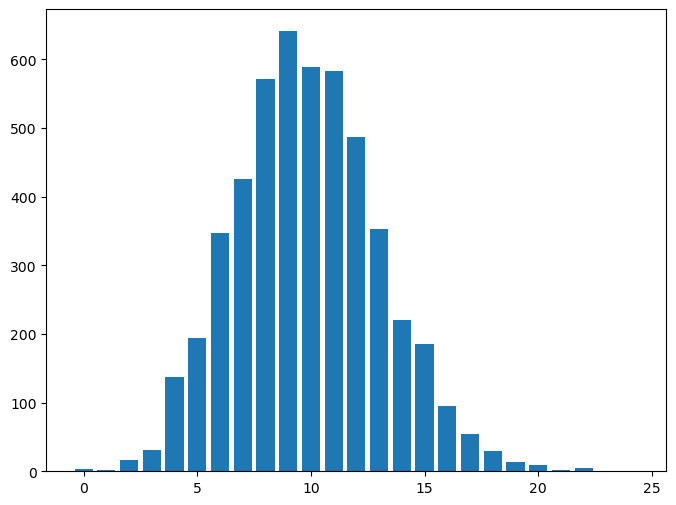

In [67]:
degree_sequence = sorted((d for n, d in G_erdos.degree()), reverse=True)
print(degree_sequence)
plt.figure(figsize=(8,6))
plt.bar(*np.unique(degree_sequence, return_counts=True))
